In [90]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [91]:
def Y(x, v = 800, tetha = 45):
    return x*np.tan(np.deg2rad(tetha)) - (0.5*9.8*(x/(v*np.cos(np.deg2rad(tetha))))**2)

def difY(x, v = 800, tetha = 45):
    return np.tan(np.deg2rad(tetha)) - (9.8*x/(v**2 * np.cos(np.deg2rad(tetha))**2))

<function matplotlib.pyplot.show(close=None, block=None)>

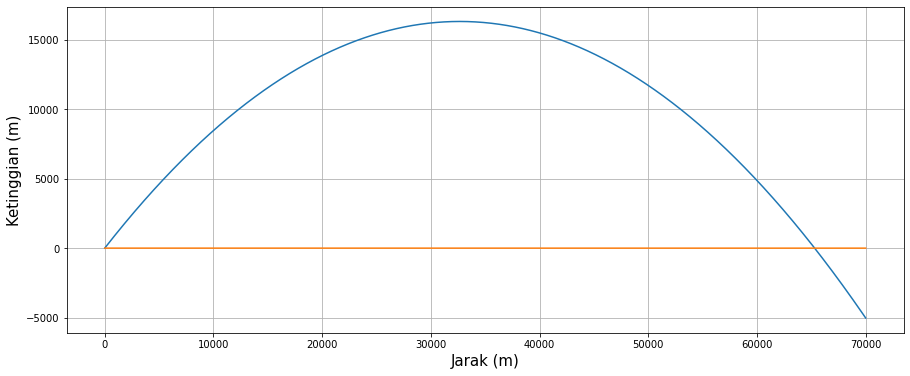

In [109]:
x = np.linspace(0, 70000, 100000)
plt.figure(figsize= (15, 6))
plt.plot(x, Y(x)); plt.ylabel("Ketinggian (m)", fontsize = 15)
plt.plot(x, difY(x)); plt.grid(); plt.xlabel("Jarak (m)", fontsize = 15)
plt.show

In [93]:
X_eksak = ((800**2)/9.8)*np.sin(2*np.deg2rad(45))
print(X_eksak)

65306.122448979586


In [94]:
#@jit(nopython = True)
def bisection(a, b, x_eksak, n = 6):
    a_temp = a; b_temp = b; err = []
    while True:
        c = (a_temp + b_temp)/2
        err.append(abs((x_eksak-c)/x_eksak))
        #print(c)
        if Y(a_temp)*Y(c)<0:
            b_temp = c
        if Y(a_temp)*Y(c) >0:
            a_temp = c
        if round(Y(a_temp)*Y(c), n)==0:
            break
    return c, err

#@jit(nopython = True)
def newton_raphson(x_init, error, x_eksak):
    x_new = 0; x_mula = x_init; galat = 5; err = []
    while galat>=error:
        x_new = x_mula - (Y(x_mula)/difY(x_mula))
        galat = abs((x_new-x_mula)/x_new)
        err.append(abs((x_eksak-x_new)/x_eksak))
        x_mula = x_new
    return x_new, err


In [95]:
bisection_method = bisection(60000, 70000, 65306.122448979586)
nr_method = newton_raphson(60000, 0.001, 65306.122448979586)

In [96]:
x_b = bisection_method[0]; err_b = bisection_method[1]
x_nr = nr_method[0]; err_nr = nr_method[1]

print("Perhitungan Bisection -> x = ", x_b)
print("\nPerhitungan Newton Raphson -> x = ", x_nr)

Perhitungan Bisection -> x =  65306.12230300903

Perhitungan Newton Raphson -> x =  65306.12269330129


In [97]:
print("Error relatif Bisection -> ", err_b[-1])
print("Error relatif newton raphson ->", err_nr[-1])

Error relatif Bisection ->  2.2351740881276784e-09
Error relatif newton raphson -> 3.7411760581562706e-09


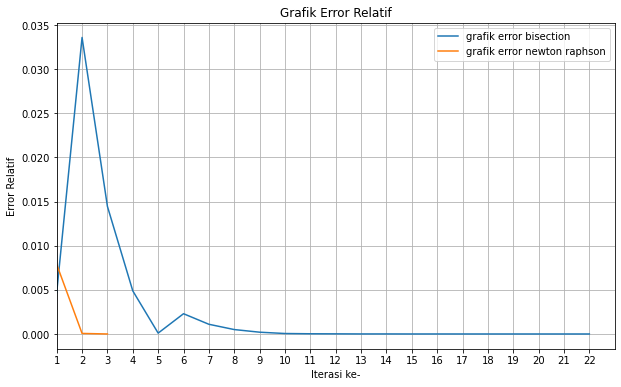

In [106]:
plt.figure(figsize = (10, 6))
plt.plot([i+1 for i in range(len(err_b))], err_b, label = 'grafik error bisection')
plt.plot([i+1 for i in range(len(err_nr))], err_nr, label = 'grafik error newton raphson')
plt.legend(); plt.xlabel("Iterasi ke-"); plt.ylabel("Error Relatif")
plt.title("Grafik Error Relatif")
plt.xlim([1, len(err_b)+1]); plt.xticks([i+1 for i in range(len(err_b))])
plt.grid()
plt.show()